In [1]:
import numpy
import autograd.numpy as np
from autograd import grad, elementwise_grad
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def relu(x):
    return np.maximum(x, 0)

def neural_network(x, weights, activation_function=sigmoid):
    for W in weights[:-1]:
        x = np.vstack([np.ones(x.shape[1]), x])
        x = activation_function(W @ x)
    x = np.vstack([np.ones(x.shape[1]), x])
    x = weights[-1] @ x
    return x

def cost(X, g_t, equation, weights):
    return np.mean(equation(X, g_t, weights)**2)

def solve(equation, g_t, X, layers, epochs, learning_rate=0.001):

    cost_grad = elementwise_grad(cost, 3)
    weights = [np.random.randn(layers[layer + 1], layers[layer] + 1) for layer in range(len(layers) - 1)]

    for epoch in range(epochs):
        dW = cost_grad(X, g_t, equation, weights)
        for w in range(len(weights)):
            weights[w] -= learning_rate * dW[w]
    return weights

def plot2D(xs, nn_solution, analytical_solution):
    print('Max absolute difference:', np.max(np.abs(nn_solution - analytical_solution)))
    plt.figure(figsize=(6, 6))
    plt.plot(xs.flatten(), analytical_solution.flatten(), label='Analytical')
    plt.plot(xs.flatten(), nn_solution.flatten(), label='Neural network')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.show()

def plot3D(ts, xs, nn_solution, analytical_solution):
    print('Max absolute difference:', np.max(np.abs(nn_solution - analytical_solution)))
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(14, 6))
    ax1.plot_surface(ts, xs, analytical_solution)
    ax1.set(title='Analytical_solution')
    ax2.plot_surface(ts, xs, nn_solution)
    ax2.set(title='Neural network')
    ax3.plot_surface(ts, xs, nn_solution - analytical_solution)
    ax3.set(title='Difference')
    plt.show()

Max absolute difference: 0.1404509958253377


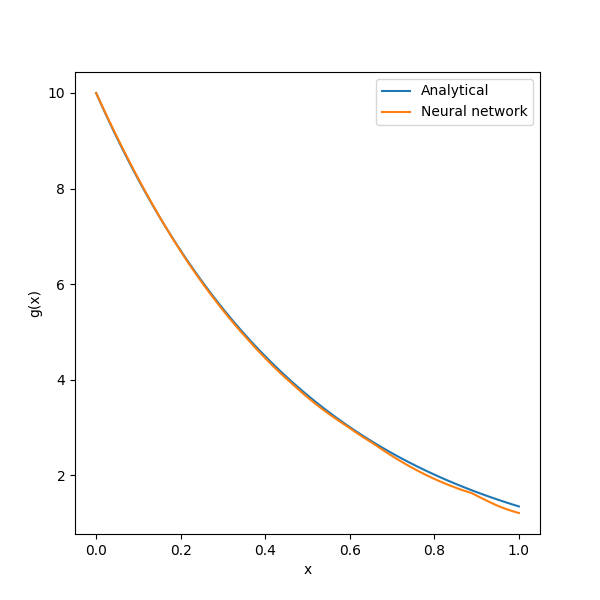

In [12]:
def g_analytic(x, gamma = 2, g0 = 10):
    return g0 * np.exp(-gamma * x)

def g_trial(x, weights):
    g0 = 10
    return g0 + x * neural_network(x, weights, relu)

def equation(x, g, weights):
    g_x = elementwise_grad(g, 0)
    gamma = 2
    return gamma * g(x, weights) + g_x(x, weights)

n = 10
xs = np.linspace(0, 1, n).reshape(1, n)
layers = [1, 100, 1]
epochs = 1000
weights = solve(equation, g_trial, xs, layers, epochs)

n = 100
xs = np.linspace(0, 1, n).reshape(1, n)
nn_solution = g_trial(xs, weights)
analytical_solution = g_analytic(xs)

plot2D(xs, nn_solution, analytical_solution)

Max absolute difference: 0.6467256340762669


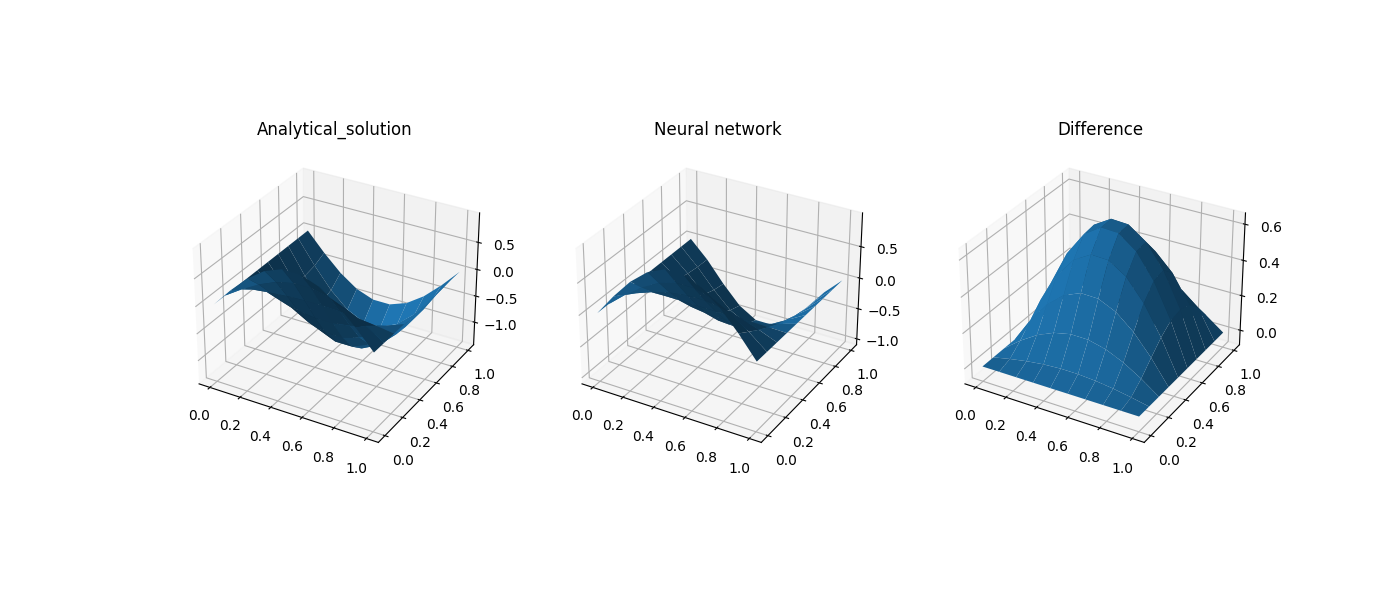

In [4]:
%matplotlib widget

def g_analytic(t, x):
    return np.sin(np.pi * x) * np.cos(np.pi * t) - np.sin(np.pi * x) * np.sin(np.pi * t)

def g_trial(t, x, weights):
    X = np.vstack((t, x))
    return (1 - t**2) * np.sin(np.pi * x) - t * np.pi * np.sin(np.pi * x) + x * (1 - x) * t**2 * neural_network(X, weights)

def equation(X, g, weights):
    t = X[0,:]
    x = X[1,:]
    g_t = elementwise_grad(g, 0)
    g_tt = elementwise_grad(g_t, 0)
    g_x = elementwise_grad(g, 1)
    g_xx = elementwise_grad(g_x, 1)
    return g_tt(t, x, weights) - g_xx(t, x, weights)


ts = np.linspace(0, 1, 10)
xs = np.linspace(0, 1, 10)
ts, xs = np.meshgrid(ts, xs)
X = np.vstack([xs.ravel(), ts.ravel()])

layers = [2, 100, 1]
epochs = 100
weights = solve(equation, g_trial, X, layers, epochs)
nn_solution = g_trial(X[0,:], X[1,:], weights).reshape(10, 10)
analytical_solution = g_analytic(X[0,:], X[1,:]).reshape(10, 10)

plot3D(ts, xs, nn_solution, analytical_solution)